In [12]:
import pandas as pd
# filepaths = ['filter_dup_2020-09-07-01.csv', 'filter_dup_2020-09-07-02.csv']
# list_ = []
# for file_ in filepaths:
#     df = pd.read_csv(file_,index_col=None, header=0)
#     list_.append(df)
# data = pd.concat(list_, axis = 0, ignore_index = True)
data = pd.read_csv('preprocess.csv',index_col=None, header=0)
columns=['time', 'icao24', 'lat', 'lon', 'baroaltitude']
data = data[columns]
# data.groupby('icao24').apply(lambda x: print(len(x)))

# 过滤20点以下的数据
data = data.groupby(by=[data['icao24']]).filter(lambda x: len(x) >= 20)
# 连接字符
# data['id'] = data['segment'].apply(str).str.cat(data['callsign'].apply(str), sep='_').str.cat(data['maxtimestep'].apply(str), sep='_')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80793 entries, 0 to 80848
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          80793 non-null  float64
 1   icao24        80793 non-null  object 
 2   lat           80793 non-null  float64
 3   lon           80793 non-null  float64
 4   baroaltitude  80793 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.7+ MB


In [13]:
id_list = data['icao24'].unique()
print(id_list)
data.groupby('icao24').count()

['06a120' '406948' 'a5d140' '02a1b3' '040078' '345686' '3949e4' '39cf0a'
 '406814' '406d7a' '406e11' '406e66' '4070ec' '407177' '4242bd' '424344'
 '4243dd' '42454d' '4245fb' '424970' '440002' '440102' '4404bd' '4408ff'
 '452086' '45ce4b' '471f92' '48412b' '4892c0' '49d3d6' '4ac962' '4ba892'
 '4ba914' '4ba9c1' '4bb186' '4bccba' '4bce04' '4caaab' '4d012f' '504e68'
 '507c46' '515309' '600b21' '710058' '71c038' '780a3e' '780a64' '781073'
 '781921' '781be8' '7c1ca2' '7c32f3' '7c4ed8' '7c6d26' '7c77f4' '7c80fc'
 '7c81d8' '7cf86e' '8005f3' '800bfa' '800d33' '8013f8' '845ebc' '846866'
 '846adc' '846def' '84b794' '84bac2' '8518f2' '861b64' '86d215' '86d295'
 '86da40' '8880e2' '896317' '8a0377' 'a017a8' 'a01bbc' 'a02cf1' 'a03397'
 'a033f9' 'a037b9' 'a04695' 'a04a4d' 'a05269' 'a0563b' 'a07177' 'a08e3c'
 'a0ac93' 'a0acfd' 'a0d374' 'a0d64f' 'a0e7ed' 'a105e8' 'a10d7f' 'a1235b'
 'a12625' 'a14c53' 'a15212' 'a15c80' 'a16068' 'a17f45' 'a18194' 'a18e7d'
 'a1b573' 'a1ba59' 'a1bb83' 'a1bd46' 'a1c0ec' 'a1c5

,time,lat,lon,baroaltitude
icao24,,,,
02a1b3,354,354,354,354
040078,359,359,359,359
06a120,360,360,360,360
345686,290,290,290,290
3949e4,80,80,80,80
...,...,...,...,...
e48275,197,197,197,197
e483ba,81,81,81,81
e48b00,303,303,303,303


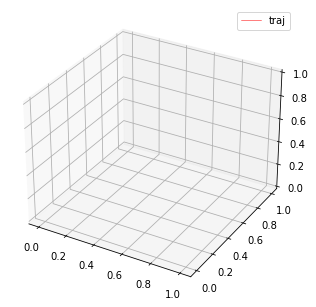

In [14]:
# 对数据进行可视化分析
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def show_3D(obs_traj):
    fig = plt.figure()
    ax = Axes3D(fig)
    line_width = 0.5
    ax.plot(obs_traj[:, 2], obs_traj[:, 3], obs_traj[:, 4], color='r', label='traj',linewidth=line_width)
    ax.legend()
    plt.show()
plt_data = data[data['icao24'] == 'e80329']
show_3D(np.array(plt_data))

In [15]:
# time的最小值
print(data['time'].min())

#经度lon的最大最小值
print("经度lon的最小值 is {}".format(data['lon'].min()))
print("经度lon的最大值 is {}".format(data['lon'].max()))
print("经度lon的最大最小差值 is {}".format(data['lon'].max() - data['lon'].min()))

#纬度lat的最大最小值
print("lat的最小值 is {}".format(data['lat'].min()))
print("lat的最大值 is {}".format(data['lat'].max()))
print("纬度lat的最大最小差值 is {}".format(data['lat'].max() - data['lat'].min()))

#高度baroaltitude的最大最小值
print("baroaltitude的最小值 is {}".format(data['baroaltitude'].min()))
print("baroaltitude的最大值 is {}".format(data['baroaltitude'].max()))
print("baroaltitude的最大最小差值 is {}".format(data['baroaltitude'].max() - data['baroaltitude'].min()))

#速度velocity的最大最小值
# print("velocity的最小值 is {}".format(data['velocity'].min()))
# print("velocity的最大值 is {}".format(data['velocity'].max()))
# print("velocity的最大最小差值 is {}".format(data['velocity'].max() - data['velocity'].min()))

#角度heading的最大最小值
# print("heading的最小值 is {}".format(data['heading'].min()))
# print("heading的最大值 is {}".format(data['heading'].max()))
# print("heading的最大最小差值 is {}".format(data['heading'].max() - data['heading'].min()))

1630252800.0
经度lon的最小值 is -157.5161852155413
经度lon的最大值 is 153.54330623851104
经度lon的最大最小差值 is 311.05949145405236
lat的最小值 is -37.73167419433594
lat的最大值 is 63.35696411132813
纬度lat的最大最小差值 is 101.08863830566406
baroaltitude的最小值 is -68.58
baroaltitude的最大值 is 13731.240000000002
baroaltitude的最大最小差值 is 13799.820000000002


In [16]:
STATE_PARAM={
    'lon_max': 153.6899521771599,
    'lon_min':  -157.5161852155413,
    'lon_scale': 311.2061373927012,

    'lat_max': 68.65235409494173,
    'lat_min':  -38.503867973715614,
    'lat_scale': 107.15622206865734,

    'alt_max':  22250.4,
    'alt_min':   -106.68,
    'alt_scale': 22357.08,

#     'vel_max': 229.926543136,
#     'vel_min':  43.4388067974,
#     'vel_scale': 186.4877363386,

#     'head_max': 359.999714666,
#     'head_min': 0.0,
#     'head_scale': 359.999714666,
}

In [17]:
# import pandas as pd
# data = pd.read_csv('climb_H8D_train.csv')
# data = pd.DataFrame(data)


# 将时间戳转化为真实时间
# data['time'] = pd.to_datetime(data['time'],unit='s',origin=pd.Timestamp('1970-01-01'))

# unique_icao24 = data['icao24'].unique()
# print("icao24 lenth is ",len(unique_icao24))
# real_datas = []
# for id in unique_icao24:
#     each_data = data[data['icao24'] == id]
#     # 设置时间索引
#     time_min = each_data['time'].min()
#     time_max = len(each_data)+time_min
#     each_data['time'] = [x for x in range(time_min, time_max)]
#     real_datas.append(each_data)
# data = pd.concat(real_datas, axis=0, ignore_index=True)
# data.info()

In [18]:
# data.head(10)

In [19]:
# data.to_csv('resample_state_2020-0907.csv', index=False)

In [20]:
# 判断每个icao24的时间是否连续
# data = data.groupby(by=[data['icao24']]).filter(lambda x:print (x['time'].max()-x['time'].min()==((len(x)-1))))
# data.info()

In [21]:
time_min = 1630281600


# 对单列数据操作进行归一化
data['time'] = data['time'].astype('int64')
data['time'] = data['time'].map(lambda x:int((int(x) - time_min)))
data['icao24'] = data['icao24'].map(lambda x: list(id_list).index(x))
data['lat'] = data['lat'].apply(lambda x: (x - STATE_PARAM['lat_min'])/STATE_PARAM['lat_scale'])
data['lon'] = data['lon'].apply(lambda x: (x - STATE_PARAM['lon_min'])/STATE_PARAM['lon_scale'])
data['baroaltitude'] = data['baroaltitude'].apply(lambda x: (x - STATE_PARAM['alt_min'])/STATE_PARAM['alt_scale'])
# data['velocity'] = data['velocity'].apply(lambda x: (x - STATE_PARAM['vel_min'])/STATE_PARAM['vel_scale'])
# data['heading'] = data['heading'].apply(lambda x: (x - STATE_PARAM['head_min'])/STATE_PARAM['head_scale'])
data.sort_values(by=['time', 'icao24'], inplace=True)
data.head(10)

,time,icao24,lat,lon,baroaltitude
0,-28800,0,0.712793,0.113518,0.108725
1,-28800,1,0.708481,0.113015,0.117587
2,-28800,2,0.712011,0.114348,0.327880
6,-28790,0,0.712936,0.113526,0.113838
13,-28790,1,0.708366,0.113003,0.116564
180,-28790,2,0.712173,0.114337,0.331288
3,-28790,3,0.785423,0.523083,0.249148
4,-28790,4,0.680608,0.605421,0.522836
7,-28790,5,0.697623,0.557910,0.536810
8,-28790,6,0.786225,0.272312,0.156442


In [22]:
data.to_csv('normal.csv', index=False)

# 其他(暂不执行)

In [ ]:
grouped   = data.groupby(by=[data['icao24']])
grouped.groups

In [ ]:
data.set_index('time')
real_datas = []
icao24_list = data['icao24'].unique()
icao24_list
spec_data = data[data['icao24']== 1220]
spec_data['time'].max()
spec_data['time'].min()

In [ ]:
for id in icao24_list:
    spec_data = data[data['icao24']== id]
    spec_data.sort_values(by=['time'],inplace=True)
    spec_data.set_index('time')
    max_time = spec_data['time'].max()
    min_time = spec_data['time'].min()
    new_index = pd.Index(range(min_time, max_time, 1))
    spec_data.reindex(new_index)
    spec_data.reset_index(drop=True, inplace=True)
    real_datas.append(spec_data)

In [ ]:
real_datas

In [ ]:
data = pd.concat(real_datas, axis=0, ignore_index=True)
data.head(10)



In [ ]:
data.sort_values(by=['icao24','time'], inplace=True)
data.to_csv('reindex_state_2020-0907.csv', index=False)

In [ ]:
# 对轨迹进行切割
def new_data_frame(origin, index):
    """
    根据已有的数据结构构建新的dataframe，并且填充index索引处的数据
    """
    new_data = pd.DataFrame(columns=origin.columns)
    return new_data.append(origin.iloc[index])
real_datas = []
icao24_list = data['icao24'].unique()
for id in icao24_list:
    spec_data = data[data['icao24']== id]
    spec_data.sort_values(by=['time'],inplace=True)
    spec_data.reset_index(drop=True, inplace=True)
    real_data = new_data_frame(spec_data, 0)
    print(len(spec_data))
    # 若轨迹长度不大于60，直接添加
    if len(spec_data) <= 60:
        real_datas.append(spec_data)
        continue
    # 若轨迹长度大于60， 对航迹进行切割
    index = 1
    while index < len(spec_data):
        if len(real_data)< 60:
            real_data = real_data.append(spec_data.iloc[index])
        if len(real_data) == 60:
            real_datas.append(real_data)
            real_data = new_data_frame(spec_data, index)
        index +=1
print(len(real_datas))
print(real_datas[0])
for i in range(len(real_datas)):
    real_datas[i]['icao24'] = str(i)
data = pd.concat(real_datas, axis=0, ignore_index=True)
data.head(10)

    # 分组替换reg值
    # group = int(len(spec_data)/60) + 1
    # print(len(spec_data))
    # # print(len(spec_data),group)
    # for i in range(0,group-1):
    #     previous = i*60
    #     after = (i+1)*60
    #     # spec_data.loc[previous:after]
    #     print(previous, after)
    # print(after,after + len(spec_data)%60 )

In [ ]:
print(real_datas[0])
# data.drop_duplicates(subset=['time','icao24'],keep='first',inplace=True)
# data.drop_duplicates(subset=['icao24', 'lat', 'lon', 'baroaltitude'],keep='first',inplace=True)
data.info()
